In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("dark")

In [2]:
train = pd.read_csv("../data/train_fe_small.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,international_plan,voice_mail_plan,area_code_408,area_code_415,area_code_510,region_Midwest,region_Northeast,region_South,region_West,account_length,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.557851,...,0.611765,0.632805,0.284372,0.368421,0.284177,0.455,0.50,0.455556,0.333333,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.376033,...,0.841176,0.481074,0.449473,0.766917,0.449367,0.470,0.35,0.470370,0.222222,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.611570,...,0.482353,0.545455,0.200399,0.375940,0.200000,0.430,0.20,0.429630,0.111111,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.384298,...,0.335294,0.563895,0.365784,0.503759,0.365823,0.520,0.30,0.520370,0.333333,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.400826,...,0.547059,0.379165,0.463422,0.413534,0.463291,0.000,0.00,0.000000,0.000000,0.0


In [4]:
cols = ['region_South', 'region_West', 'account_length','number_vmail_messages', 'total_day_minutes', 'total_day_calls',
        'total_intl_charge', 'customer_service_calls', 'churn']

In [5]:
train = train[cols]

In [6]:
x_train_use, y_train_use = train.drop("churn", axis = 1), train["churn"]

In [7]:
#x_train_use = x_train_use.drop_duplicates().reset_index(drop=True)

In [8]:
train.shape

(776, 9)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

In [10]:
x_train.shape, y_train.shape

((620, 8), (620,))

### Logistic Regression

In [11]:
lr = LogisticRegression()
lr.fit(x_train, np.array(y_train).reshape(-1,1))

LogisticRegression()

In [12]:
y_pred = lr.predict(x_train)

In [13]:
f1_score(y_train, y_pred)

0.6698717948717948

In [14]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [15]:
lr_pipeline = Pipeline([("lr", LogisticRegression())])
param_grid = [{"lr__C":np.linspace(0,1,10), "lr__penalty":["l1","l2", "elasticnet"]}]
grid_search = GridSearchCV(lr_pipeline, param_grid, cv = 5)

In [16]:
grid_search.fit(x_train, np.array(y_train).reshape(-1,1))

GridSearchCV(cv=5, estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             param_grid=[{'lr__C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'lr__penalty': ['l1', 'l2', 'elasticnet']}])

In [17]:
grid_search.best_params_

{'lr__C': 0.3333333333333333, 'lr__penalty': 'l2'}

In [18]:
model = grid_search.best_estimator_

In [19]:
model.fit(x_train, y_train)

Pipeline(steps=[('lr', LogisticRegression(C=0.3333333333333333))])

In [20]:
y_pred = model.predict(x_train)

In [21]:
f1_score(y_train, y_pred)

0.6624

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66       310
         1.0       0.66      0.67      0.66       310

    accuracy                           0.66       620
   macro avg       0.66      0.66      0.66       620
weighted avg       0.66      0.66      0.66       620



In [23]:
train["churn"].value_counts()

0.0    388
1.0    388
Name: churn, dtype: int64

In [24]:
import seaborn as sns; sns.set_style("darkgrid")

<AxesSubplot:>

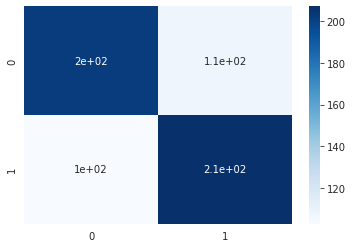

In [25]:
conf = confusion_matrix(y_train, y_pred)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [26]:
y_pred_val = model.predict(x_val)

In [27]:
f1_score(y_val, y_pred_val)

0.7189542483660132

In [28]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73        78
         1.0       0.73      0.71      0.72        78

    accuracy                           0.72       156
   macro avg       0.72      0.72      0.72       156
weighted avg       0.72      0.72      0.72       156



#### Extracting results

In [29]:
model.fit(x_train_use, y_train_use)

Pipeline(steps=[('lr', LogisticRegression(C=0.3333333333333333))])

In [30]:
pred_use = model.predict(x_train_use)

In [31]:
cross_val_score(model, x_train_use, y_train_use, scoring="f1")

array([0.63157895, 0.60645161, 0.67532468, 0.72392638, 0.72727273])

In [32]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       388
         1.0       0.68      0.69      0.68       388

    accuracy                           0.68       776
   macro avg       0.68      0.68      0.68       776
weighted avg       0.68      0.68      0.68       776



In [33]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [34]:
test = test[cols]

In [35]:
test

,region_South,region_West,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_intl_charge,customer_service_calls,churn
0,1.0,0.0,0.479339,0.00,0.525941,0.60625,0.435185,0.111111,0.0
1,0.0,0.0,0.264463,0.00,0.368016,0.85625,0.635185,0.444444,1.0
2,0.0,0.0,0.661157,0.00,0.948974,0.41875,0.270370,0.444444,1.0
3,1.0,0.0,0.454545,0.00,0.314709,0.64375,0.385185,0.222222,0.0
4,0.0,1.0,0.198347,0.00,0.340080,0.73125,0.555556,0.111111,0.0
...,...,...,...,...,...,...,...,...,...
662,0.0,0.0,0.466942,0.52,0.390821,0.55000,0.575926,0.222222,0.0
663,1.0,0.0,0.433884,0.58,0.238312,0.81875,0.405556,0.111111,0.0
664,0.0,0.0,0.243802,0.00,0.552737,0.73750,0.659259,0.333333,0.0
665,1.0,0.0,0.652893,0.00,0.484036,0.71250,0.579630,0.111111,0.0


In [36]:
x_test, y_test = test.drop("churn", axis =1), test["churn"]

In [37]:
pred_test = model.predict(x_test)

In [38]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.66      0.77       572
         1.0       0.26      0.75      0.39        95

    accuracy                           0.67       667
   macro avg       0.60      0.70      0.58       667
weighted avg       0.84      0.67      0.72       667



In [39]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [40]:
conf = confusion_matrix(y_test, pred_test)

<AxesSubplot:>

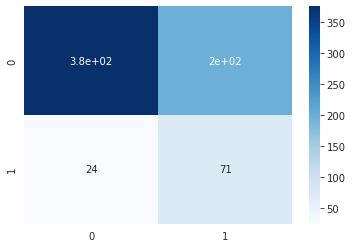

In [41]:
sns.heatmap(conf, annot=True, cmap="Blues")
#plt.show();

In [42]:
df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Logistic Regression"

In [43]:
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model
0,0.391185,0.684615,0.681122,0.264925,0.688144,0.747368,Logistic Regression


In [44]:
df.to_csv("../results/regular/lr.csv", index=False)